### Dataframe de ejemplo para el areaplot

In [1]:
import numpy as np
import pandas as pd

# Datos ficticios
fechas = [
    'sept. 2006', 'sept. 2007', 'sept. 2008', 'sept. 2009', 'sept. 2010',
    'sept. 2011', 'sept. 2012', 'sept. 2013', 'sept. 2014', 'sept. 2015',
    'sept. 2016', 'sept. 2017', 'sept. 2018', 'mar. 2020', 'sept. 2020',
    'sept. 2021', 'sept. 2022', 'sept. 2023', 'sept. 2024'
]

n = len(fechas)
np.random.seed(0)
comisiones = np.random.uniform(0.2, 0.4, n)
fiscalias = np.random.uniform(0.2, 0.4, n)
portal = 1 - comisiones - fiscalias


# Crear el DataFrame
data = pd.DataFrame({
    'fechas': fechas,
    'comisiones': comisiones,
    'fiscalias': fiscalias,
    'portal': portal
})

data

,fechas,comisiones,fiscalias,portal
0,sept. 2006,0.309763,0.374002,0.316235
1,sept. 2007,0.343038,0.395724,0.261238
2,sept. 2008,0.320553,0.359832,0.319616
3,sept. 2009,0.308977,0.292296,0.398727
4,sept. 2010,0.284731,0.356106,0.359163
5,sept. 2011,0.329179,0.223655,0.447166
6,sept. 2012,0.287517,0.327984,0.384498
7,sept. 2013,0.378355,0.228671,0.392975
8,sept. 2014,0.392733,0.388934,0.218334
9,sept. 2015,0.276688,0.304370,0.418942


### **Código a copiar para el areaplot:**

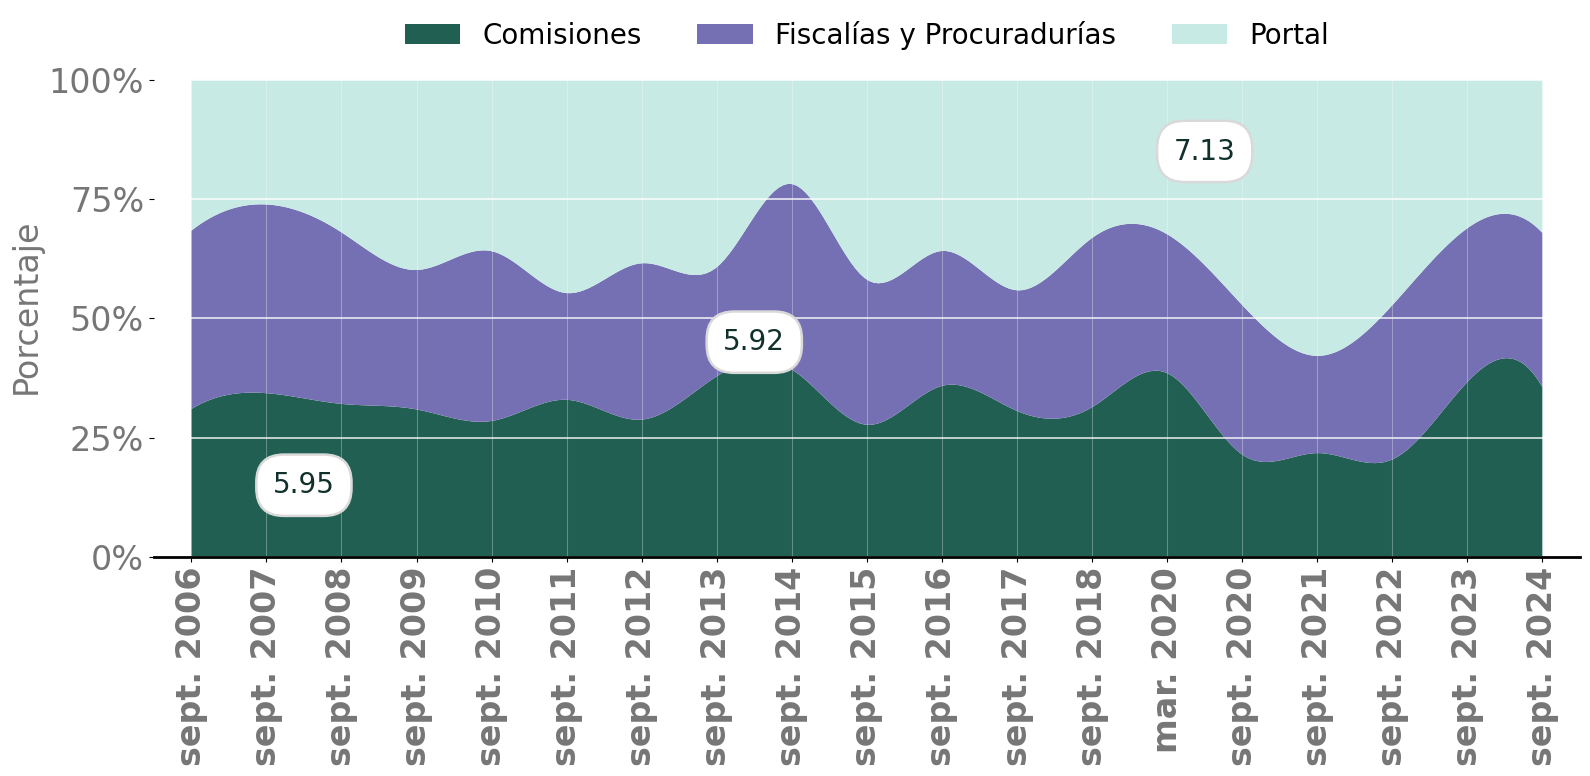

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from scipy.interpolate import make_interp_spline


# VARIABLES A CAMBIAR:
dataframe_a_graficar = data


# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("fonts/arial")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))



def areaplot(data):
    """
    Genera un gráfico de área apilada con los datos proporcionados en un DataFrame.

    Parámetros:
    - data: DataFrame que contiene las columnas 'fechas', 'comisiones', 'fiscalias' y 'portal'.
    """

    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 16, 'weight': 'bold', 'color': '#10302C'},
        'eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 20, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 12, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 10, 'weight': 'medium', 'color': '#4C6A67'},
        'leyenda': {'size': 20, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }


    # Extraer columnas del DataFrame
    fechas = data['fechas']
    comisiones = data['comisiones']
    fiscalias = data['fiscalias']
    portal = data['portal']
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(16, 8))
    n = len(fechas)
    x = np.arange(n) + 0.5  # Desfase visual

    # Suavizar las curvas visualmente
    x_suave = np.linspace(x.min(), x.max(), 300)  # Más puntos para suavizar
    comisiones_suave = make_interp_spline(x, comisiones)(x_suave)
    fiscalias_suave = make_interp_spline(x, fiscalias)(x_suave)
    portal_suave = make_interp_spline(x, portal)(x_suave)


    # Área apilada
    ax.stackplot(x_suave, comisiones_suave, fiscalias_suave, portal_suave, labels=[
                 'Comisiones', 'Fiscalías y Procuradurías', 'Portal'],
                 colors=['#215F53', '#7570B3', '#C7EAE5'])

    # Eje X
    ax.set_xticks(x)
    ax.set_xticklabels(fechas, rotation=90, fontsize=font_config['eje_x']['size'],
                        fontweight=font_config['eje_x']['weight'], color=font_config['eje_x']['color'])    
    ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)


    # Eje Y
    ax.set_yticks(np.linspace(0, 1, 5))
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'], fontsize=font_config['eje_y']['size'],
                        fontweight=font_config['eje_y']['weight'], color=font_config['eje_y']['color'])    
    ax.set_ylabel('Porcentaje', fontsize=font_config['eje_y']['size'],
                  fontweight=font_config['eje_y']['weight'], color=font_config['eje_y']['color'])    

    # Bordes y grid
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.grid(axis='y', linestyle='-', color='white', alpha=0.8, linewidth=1.25)
    ax.grid(axis='x', linestyle='-', color='white', alpha=0.3, linewidth=0.75)

    # Coordenadas y valores totales por capa
    x_coords = [2, 8, 14]
    y_coords = [0.15, 0.45, 0.85]
    totales = [round(sum(comisiones), 2), round(sum(fiscalias), 2), round(sum(portal), 2)]  # Redondear a 2 decimales
    colores_borde = ['#D9D9D9'] * 3

    # Añadir las cápsulas solo dentro de su área correspondiente
    for x, y, total, color_borde in zip(x_coords, y_coords, totales, colores_borde):
        ax.text(
            x, y, f"{total:,}",
            ha='center', va='center',
            fontsize=font_config['capsula_valor']['size'],  # Aplicar configuración de fuente
            fontweight=font_config['capsula_valor']['weight'],
            color=font_config['capsula_valor']['color'],
            bbox=dict(
                boxstyle="round,pad=0.6,rounding_size=1",
                facecolor='white',
                edgecolor=color_borde,
                linewidth=1.8
            )
        )

    # Leyenda centrada arriba con tamaño ajustado
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.12),
        ncol=3,
        frameon=False,
        prop=font_manager.FontProperties(
            size=font_config['leyenda']['size'], 
            weight=font_config['leyenda']['weight']
        )
    )

    plt.tight_layout()

    # Guardar la gráfica como archivo SVG
    plt.savefig("areaplot.svg", format="svg", bbox_inches='tight')
    plt.show()

areaplot(dataframe_a_graficar)